<a href="https://colab.research.google.com/github/vaibhavvesmaker/FIFA_EDA/blob/main/FIFA_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=33772eaf339f5f7ed96b3ac78a8d0fd330e16c769a488395d10621d387916237
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import GradientBoostingRegressor
from collections import Counter
import missingno as msno
#from google.colab import drive
#drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
...,...,...,...,...,...
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0
GKReflexes,8.0,11.0,11.0,94.0,13.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [ ]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

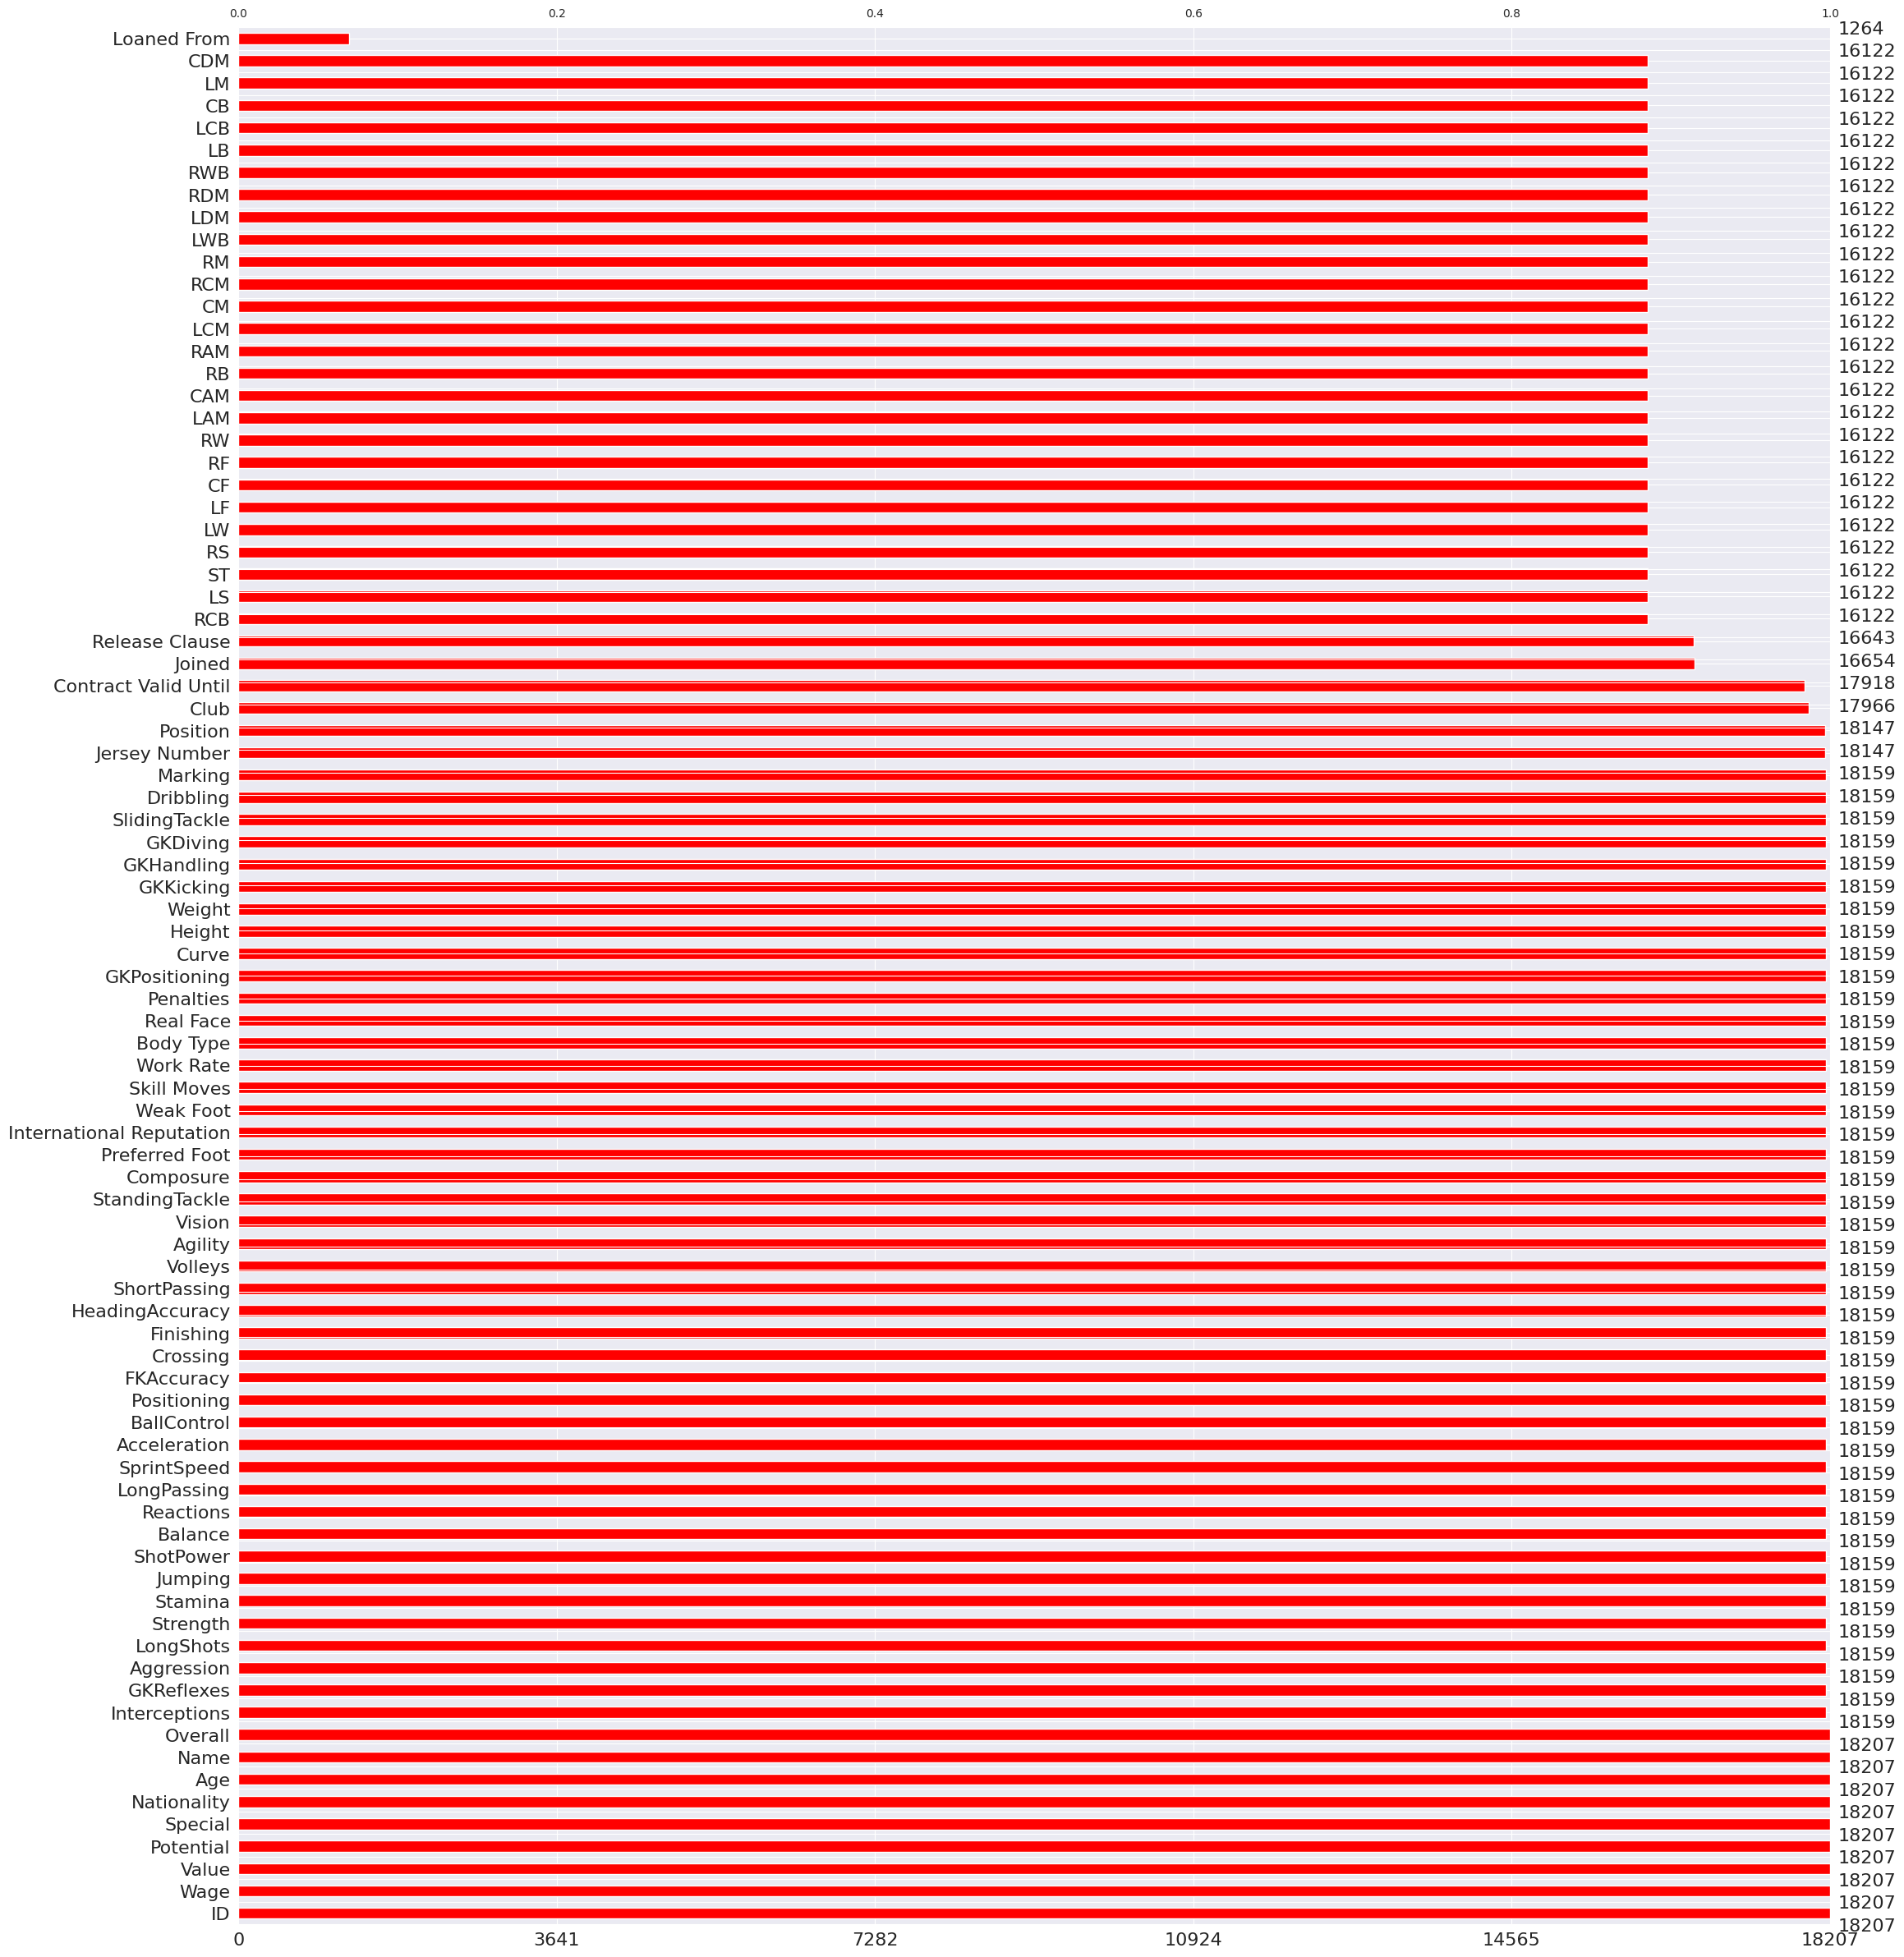

In [ ]:
#msno.bar(df.sample( 18207 ),(28,10),color='red')
# Calculate percentage of missing values for each column
missing_data = df.sample(18207).isnull().mean() * 100

# Sort the columns based on the percentage of missing values in ascending order
missing_data_sorted = missing_data.sort_values(ascending=True)

plt.figure(figsize=(28, 10))
msno.bar(df[missing_data_sorted.index], color='red')
plt.show()



In [ ]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [ ]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


In [ ]:
df.drop(df.index[missing_height],inplace =True)

In [ ]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

In [ ]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

In [ ]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
Nationality
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: count, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [ ]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Club
FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
Name: count, dtype: int64


In [ ]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [ ]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1


BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

In [ ]:
#Cleaning some of values so that we can interpret them
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [ ]:


df.head().T



,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
...,...,...,...,...,...
GKDiving,6.0,7.0,9.0,90.0,15.0
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0


In [ ]:
#Top earners
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


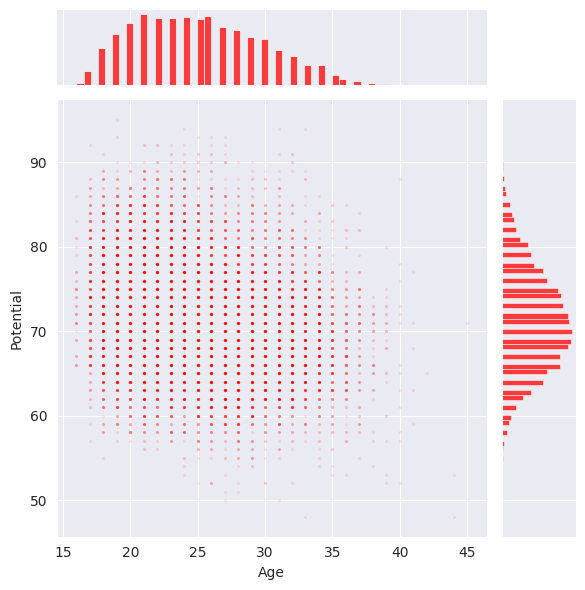

In [ ]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

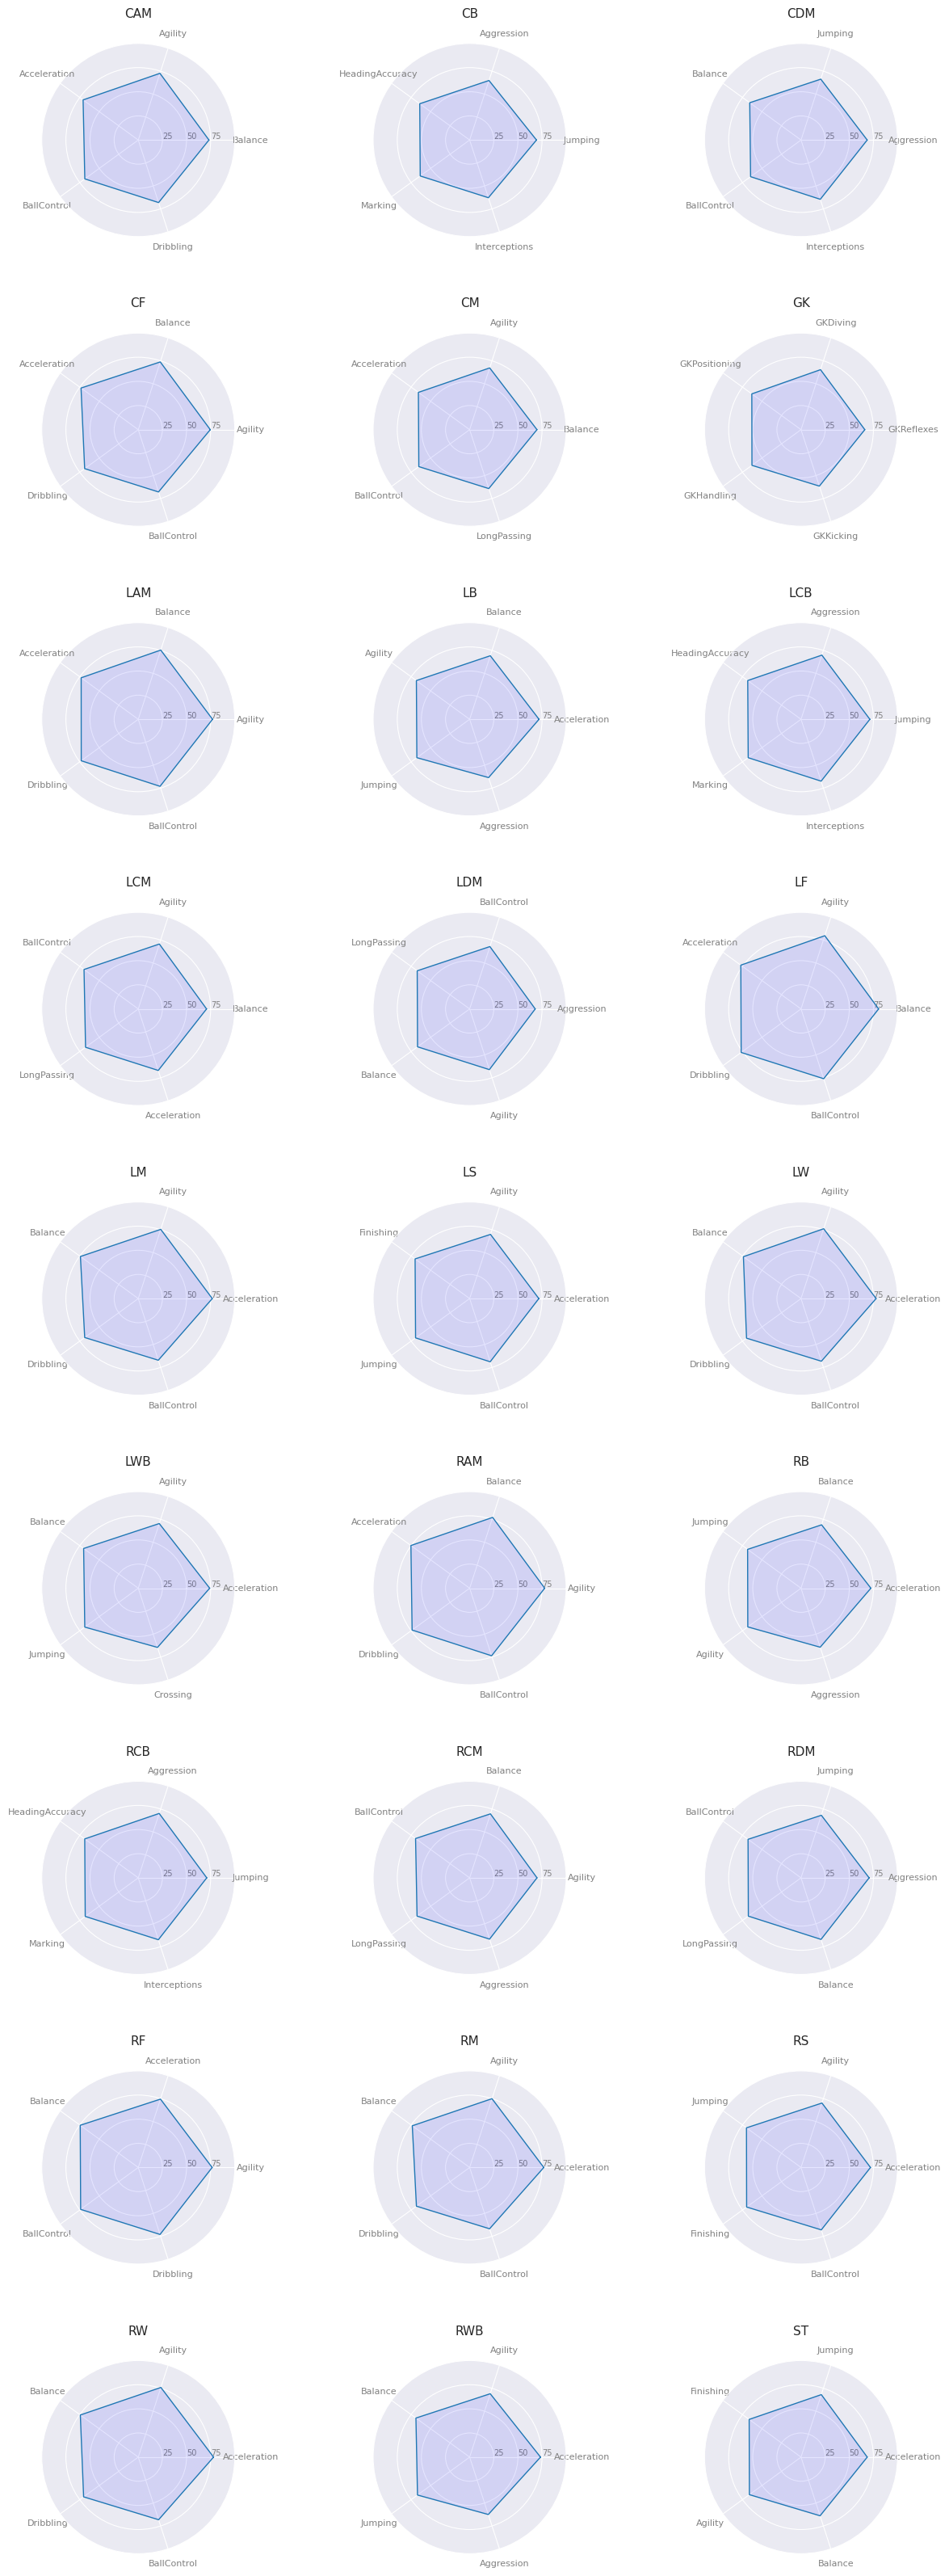

In [ ]:
player_features = (
    'Acceleration', 'Aggression', 'Agility',
    'Balance', 'BallControl', 'Composure',
    'Crossing', 'Dribbling', 'FKAccuracy',
    'Finishing', 'GKDiving', 'GKHandling',
    'GKKicking', 'GKPositioning', 'GKReflexes',
    'HeadingAccuracy', 'Interceptions', 'Jumping',
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
#for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
for position_name, features in df.groupby(df['Position'])[list(player_features)].mean().iterrows():
    top_features = dict(features.nlargest(5))

    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)

    plt.subplots_adjust(hspace = 0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(position_name, size=11, y=1.1)

    idx += 1

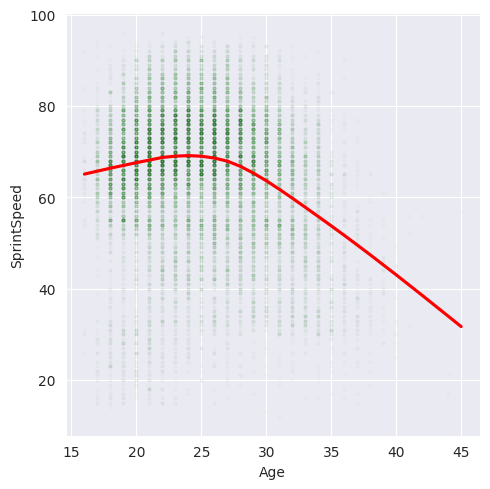

In [ ]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'},
           line_kws={'color':'red'})

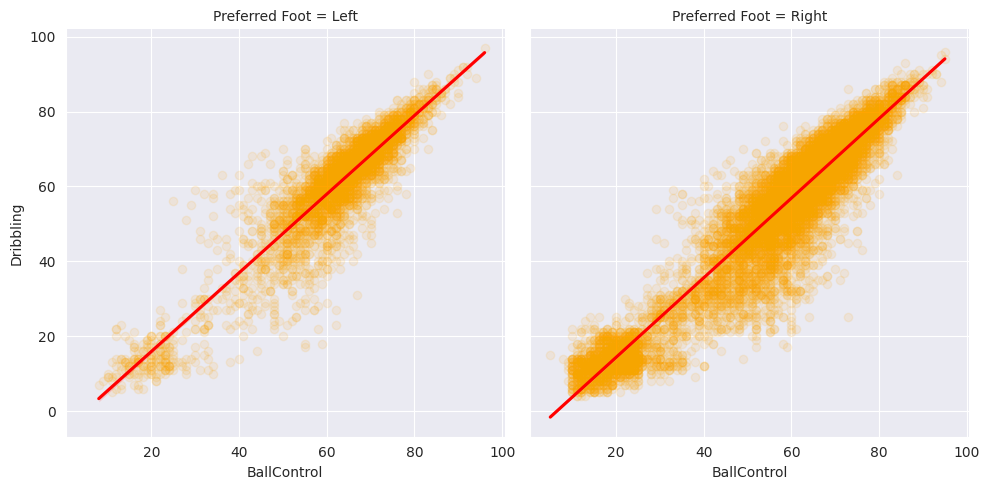

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

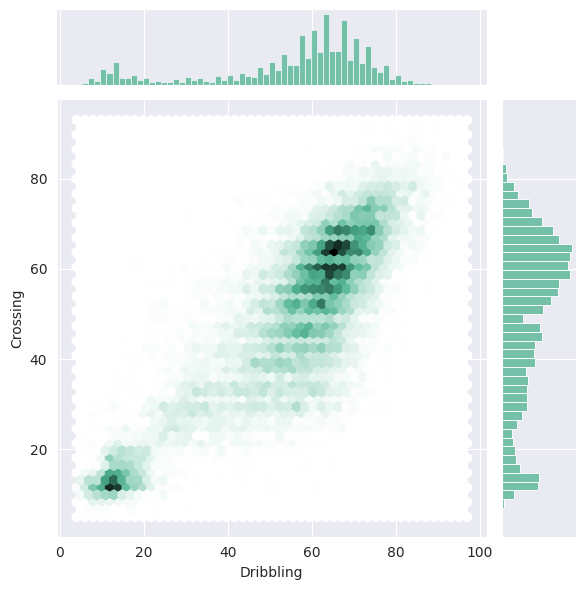

In [ ]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

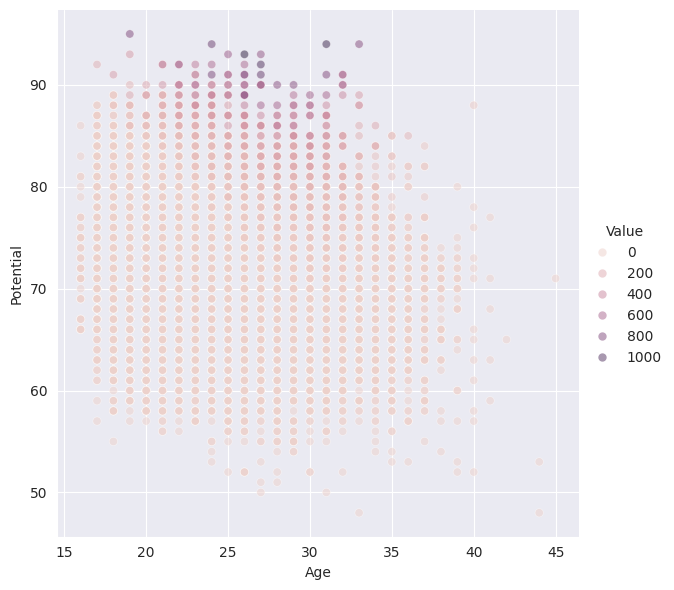

In [ ]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000,
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

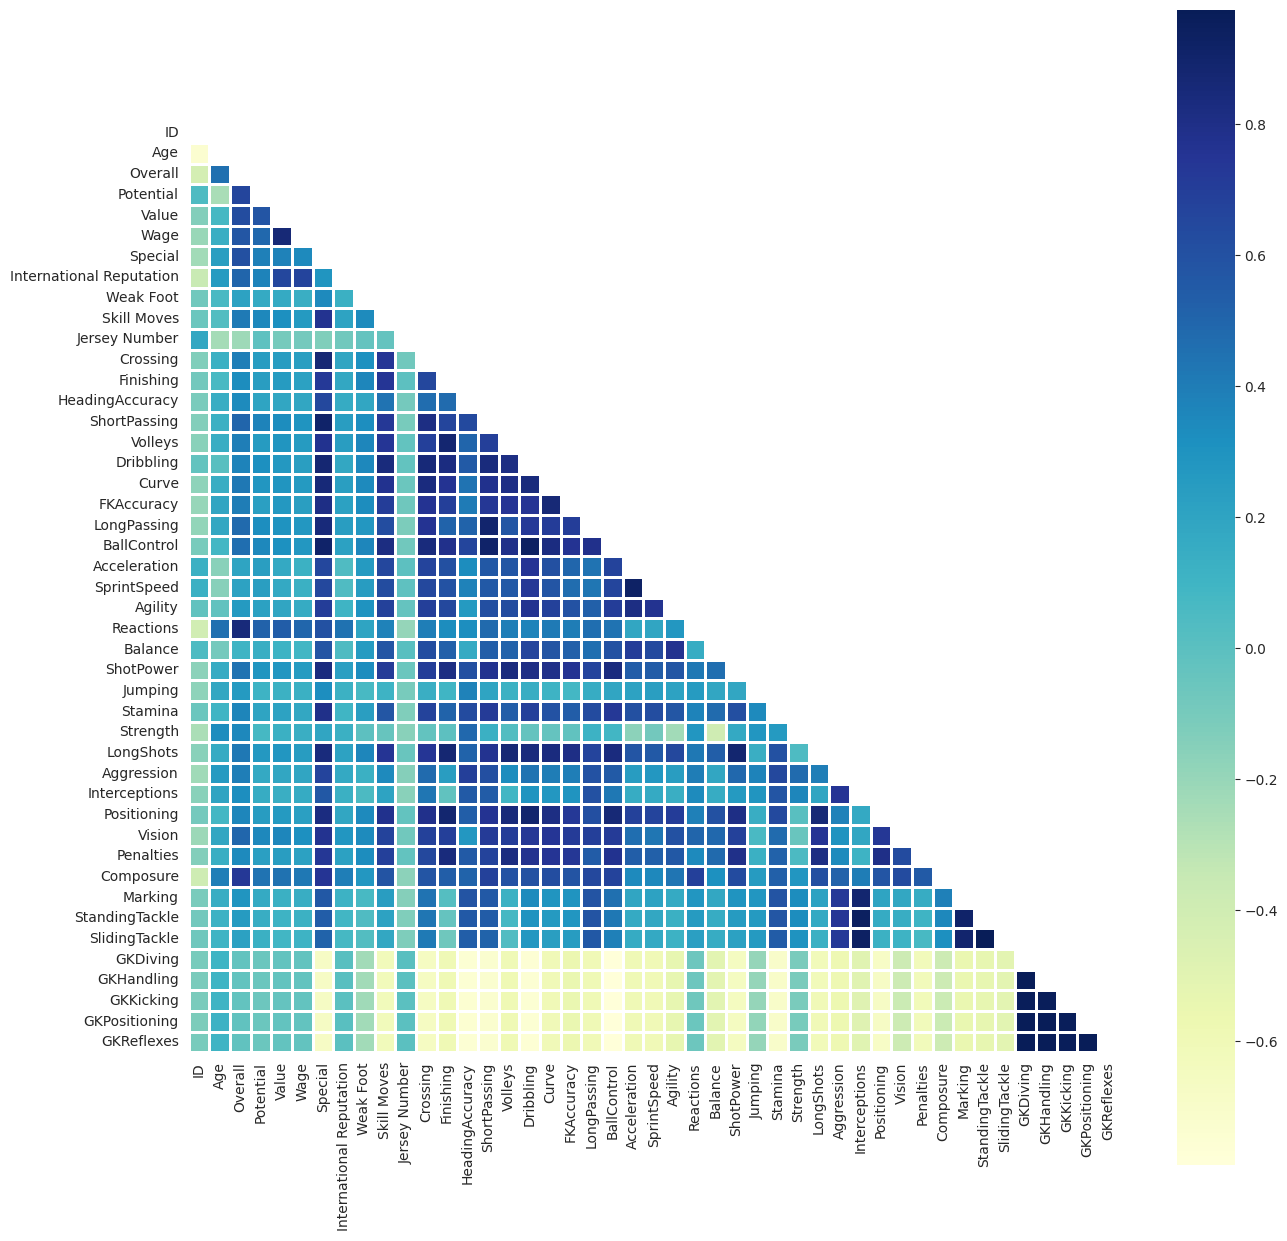

In [ ]:
'''corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")'''

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, linewidths=.8, cmap="YlGnBu")

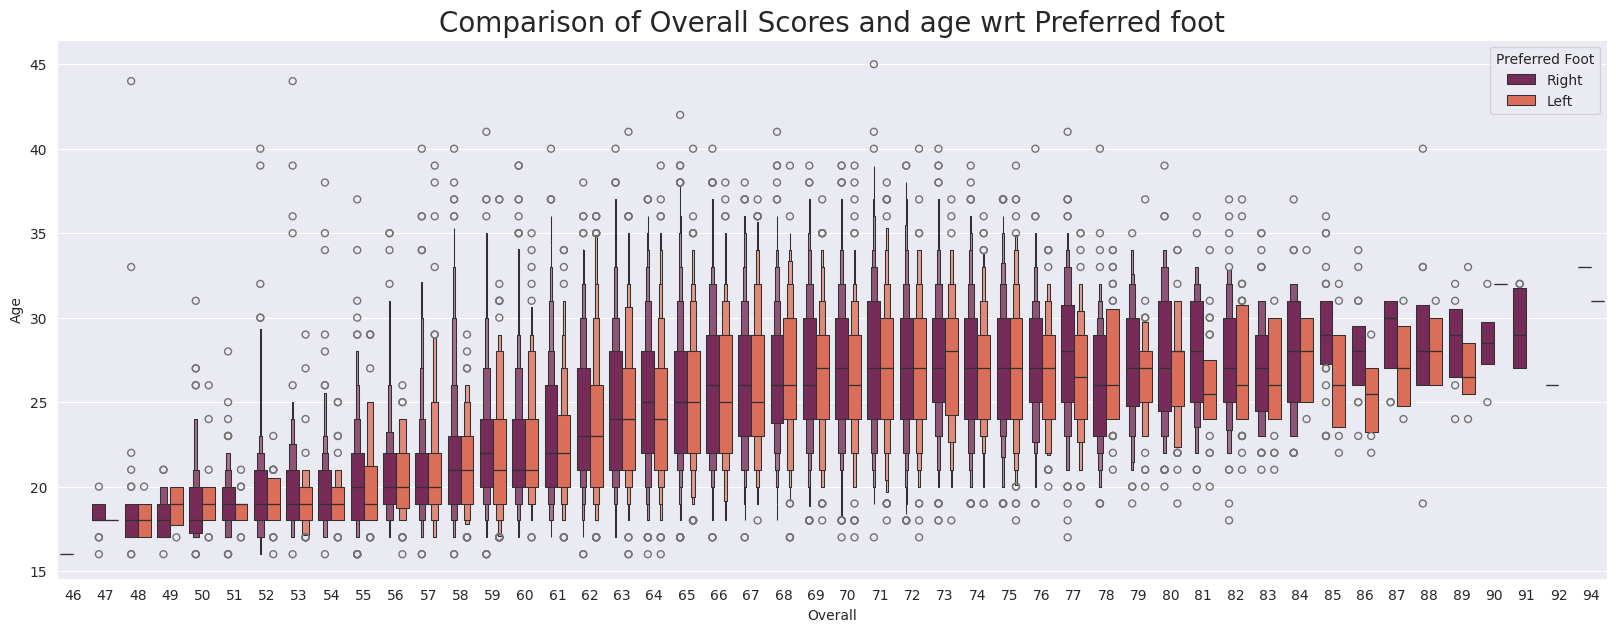

In [ ]:
'''plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()'''

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(x='Overall', y='Age', hue='Preferred Foot', data=df, palette='rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize=20)
plt.show()


In [ ]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [ ]:
df_small.head()

,Age,Overall,Potential,Acceleration,SprintSpeed,Agility,Stamina,Strength,Preferred Foot
0,31,94,94,91.0,86.0,91.0,72.0,59.0,Left
1,33,94,94,89.0,91.0,87.0,88.0,79.0,Right
2,26,92,93,94.0,90.0,96.0,81.0,49.0,Right
3,27,91,93,57.0,58.0,60.0,43.0,64.0,Right
4,27,91,92,78.0,76.0,79.0,90.0,75.0,Right


In [ ]:
#sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
              'Contract Valid Until','Wage','Value','Name','Club','Height', 'Weight'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Nationality               18147 non-null  object 
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Preferred Foot            18147 non-null  object 
 5   International Reputation  18147 non-null  float64
 6   Weak Foot                 18147 non-null  float64
 7   Skill Moves               18147 non-null  float64
 8   Work Rate                 18147 non-null  object 
 9   Real Face                 18147 non-null  object 
 10  Position                  18147 non-null  object 
 11  Crossing                  18147 non-null  float64
 12  Finishing                 18147 non-null  float64
 13  HeadingAccuracy           18147 non-null  float64
 14  ShortPassin

In [ ]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0

#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True)
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   International Reputation  18147 non-null  float64
 4   Weak Foot                 18147 non-null  float64
 5   Skill Moves               18147 non-null  float64
 6   Crossing                  18147 non-null  float64
 7   Finishing                 18147 non-null  float64
 8   HeadingAccuracy           18147 non-null  float64
 9   ShortPassing              18147 non-null  float64
 10  Volleys                   18147 non-null  float64
 11  Dribbling                 18147 non-null  float64
 12  Curve                     18147 non-null  float64
 13  FKAccuracy                18147 non-null  float64
 14  LongPassing

In [ ]:
# #Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 15295 to 11279
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14517 non-null  int64  
 1   Potential                 14517 non-null  int64  
 2   International Reputation  14517 non-null  float64
 3   Weak Foot                 14517 non-null  float64
 4   Skill Moves               14517 non-null  float64
 5   Crossing                  14517 non-null  float64
 6   Finishing                 14517 non-null  float64
 7   HeadingAccuracy           14517 non-null  float64
 8   ShortPassing              14517 non-null  float64
 9   Volleys                   14517 non-null  float64
 10  Dribbling                 14517 non-null  float64
 11  Curve                     14517 non-null  float64
 12  FKAccuracy                14517 non-null  float64
 13  LongPassing               14517 non-null  float64
 14  BallCon

In [ ]:
print(X_train.dtypes)
print(y_train.dtype)

Age                           int64
Potential                     int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     float64
Strength                    float64
LongShots                   float64
Aggression                  float64
Interceptions               float64
Positioning                 

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Age                         0
Potential                   0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure                   0
Marking                     0
StandingTackle              0
SlidingTac

In [ ]:
print(y_train.shape)

(14517,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Neural network model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),  # Add dropout for regularization
        Dense(32, activation='relu'),
        Dropout(0.2),  # Add dropout for regularization
        Dense(1)  # Output layer with single neuron for regression
    ])
    return model

# Get the input shape from X_train
input_shape = X_train.shape[1]

# Create the neural network model
nn_model = create_nn_model(input_shape)

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3520      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import numpy as np
import tensorflow as tf

# Convert X_train and y_train to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train, dtype=np.float32)

# Convert NumPy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_np, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_np, dtype=tf.float32)

# Train the model
history = nn_model.fit(X_train_tensor, y_train_tensor, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
363/363 [==============================] - 7s 4ms/step - loss: 346.7677 - mae: 13.2594 - val_loss: 32.6222 - val_mae: 4.9605
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 139.8563 - mae: 9.3653 - val_loss: 14.0187 - val_mae: 3.1418
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 134.3322 - mae: 9.2061 - val_loss: 12.4964 - val_mae: 2.9383
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 126.7875 - mae: 8.9926 - val_loss: 6.6757 - val_mae: 2.0622
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 127.9757 - mae: 8.9961 - val_loss: 11.8689 - val_mae: 2.8777
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 116.2414 - mae: 8.5687 - val_loss: 30.8405 - val_mae: 5.1663
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 112.0009 - mae: 8.3974 - val_loss: 61.8423 - val_mae: 7.5255
Epoch 8/20
363/363 [==============================] - 2

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Neural network model
# def create_nn_model(input_shape):
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(input_shape,)),
#         Dropout(0.2),  # Add dropout for regularization
#         Dense(32, activation='relu'),
#         Dropout(0.2),  # Add dropout for regularization
#         Dense(1)  # Output layer with single neuron for regression
#     ])
#     return model

# # Get the input shape from X_train
# input_shape = X_train.shape[1]

# # Create the neural network model
# nn_model = create_nn_model(input_shape)

# # Compile the model
# nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Print model summary
# print(nn_model.summary())


In [ ]:
# Convert X_train and y_train to NumPy arrays
X_test_np = np.array(X_test)
y_test_np = np.array(y_test, dtype=np.float32)

# Convert NumPy arrays to TensorFlow tensors
X_test_tensor = tf.convert_to_tensor(X_test_np, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test_np, dtype=tf.float32)

# Evaluate the model on the test data
loss, mae = nn_model.evaluate(X_test_tensor, y_test_tensor, verbose=0)

# Print the Mean Absolute Error (MAE)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 6.428407669067383


In [ ]:
# Make predictions on the test data
predictions = nn_model.predict(X_test_tensor)


114/114 [==============================] - 1s 3ms/step


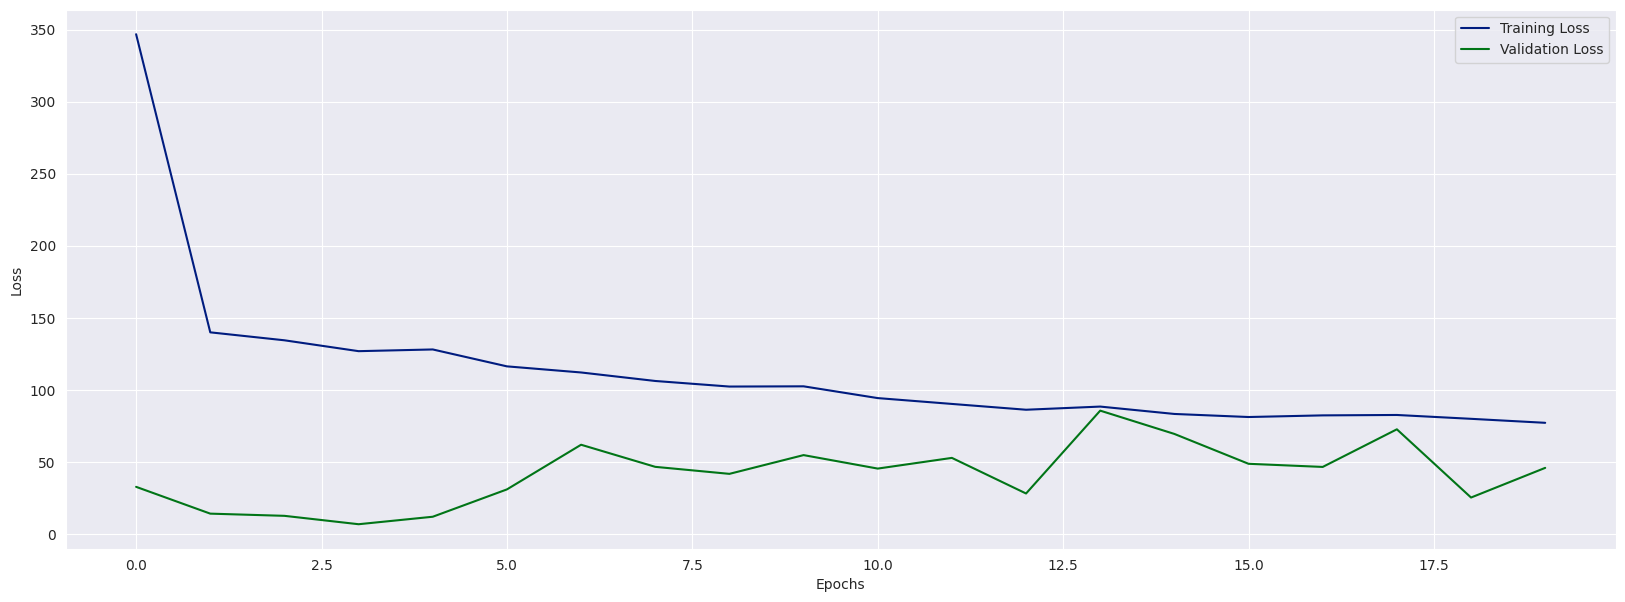

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model
nn_model.save('model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
# Example of changing optimizer to Adam and retraining the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error')
history = nn_model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
363/363 [==============================] - 5s 6ms/step - loss: 6.9969 - val_loss: 8.6133
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 6.9883 - val_loss: 7.7896
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 6.9926 - val_loss: 7.0337
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 6.9692 - val_loss: 13.1872
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 6.9342 - val_loss: 6.0896
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 6.8840 - val_loss: 5.2837
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 6.8547 - val_loss: 7.2623
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 6.8508 - val_loss: 7.6224
Epoch 9/50
363/363 [==============================] - 2s 5ms/step - loss: 6.7850 - val_loss: 6.5571
Epoch 10/50
363/363 [==============================] - 2s 5ms/step - loss: 6.9304 - val_loss: 11.12

In [ ]:
# Predict the target values for the test data
y_pred = nn_model.predict(X_test_tensor)

# Print the predicted target values
print(y_pred)


114/114 [==============================] - 0s 3ms/step
[[57.74327 ]
 [60.22468 ]
 [62.567474]
 ...
 [61.07899 ]
 [64.60801 ]
 [57.49749 ]]


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_np, y_pred)

# Print the Mean Absolute Error (MAE)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 7.91010046005249


In [ ]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9312053205550246
RMSE : 1.8115558927168078


In [ ]:
perm = PermutationImportance(LR_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions

Weight,Feature
0.3693 ± 0.0099,Potential
0.2010 ± 0.0068,Age
0.0774 ± 0.0021,Reactions
0.0659 ± 0.0052,BallControl
0.0477 ± 0.0018,GKReflexes
0.0317 ± 0.0015,GKDiving
0.0236 ± 0.0021,HeadingAccuracy
0.0224 ± 0.0014,ShortPassing
0.0199 ± 0.0018,GKHandling
0.0151 ± 0.0011,Skill Moves


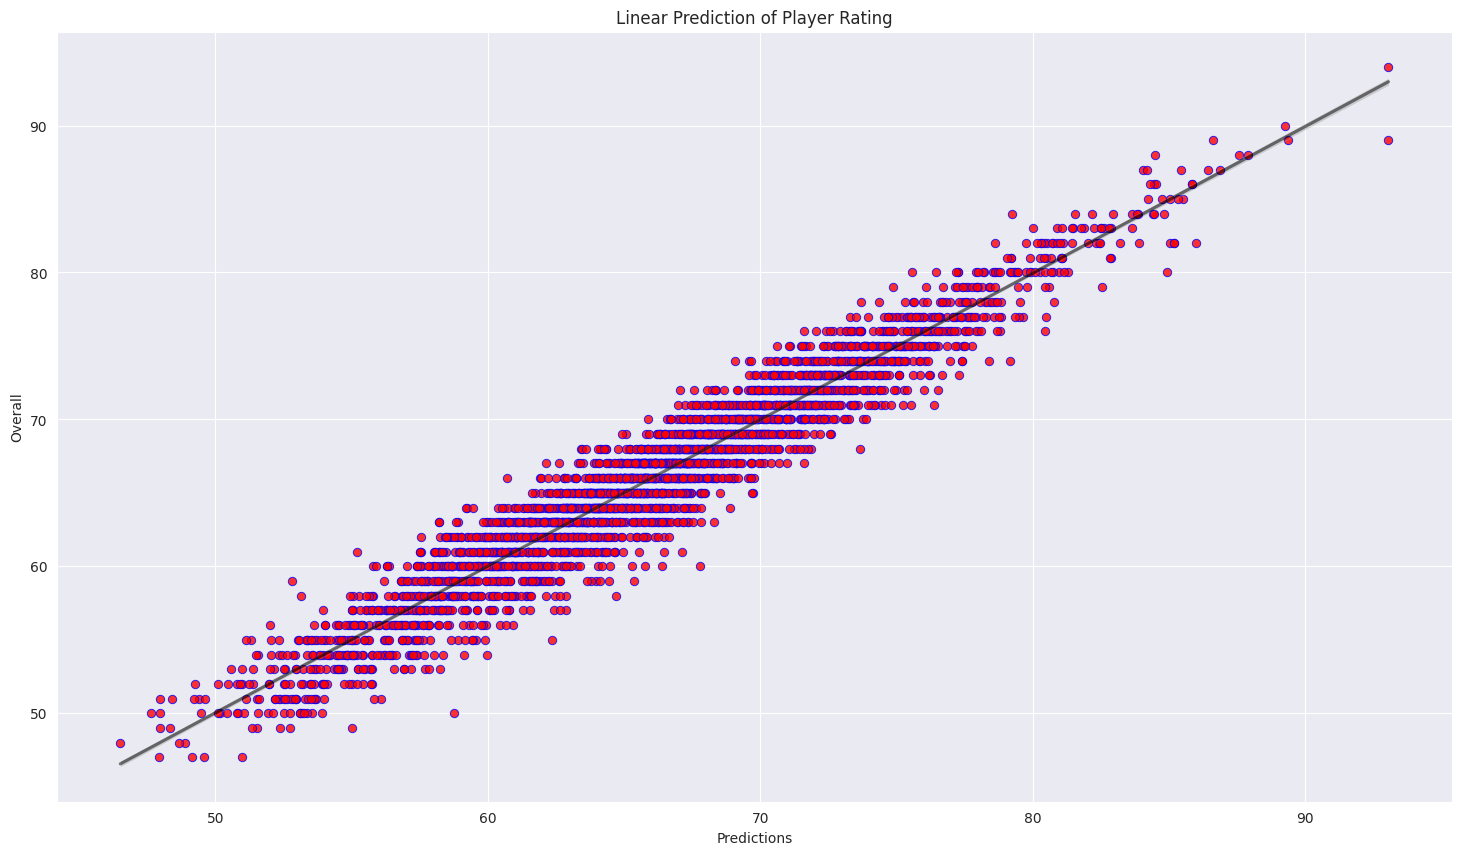

In [ ]:
#Visualising the results
'''plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()'''

#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(x=predictions, y=y_test, scatter_kws={'color':'red', 'edgecolor':'blue', 'linewidth':0.7}, line_kws={'color':'black', 'alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()


In [ ]:
# Split ID as a Target value
# target = df1.Overall
# df2 = df1.drop(['Overall'], axis=1)

# Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=42)

# One Hot Encoding
import pandas as pd
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees
RF_model.fit(X_train, y_train)

# Make predictions
RF_predictions = RF_model.predict(X_test)
RF_r2 = r2_score(y_test, RF_predictions)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print('RandomForest - r2 score: ' + str(r2_score(y_test, RF_predictions)))
print('RandomForest - RMSE : ' + str(np.sqrt(mean_squared_error(y_test, RF_predictions))))


# Initialize GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=43)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
GB_predictions = gb_model.predict(X_test)
GB_r2 = r2_score(y_test, GB_predictions)

# Evaluate the model
print('GradientBoostingRegressor - r2 score: ' + str(r2_score(y_test, GB_predictions)))
print('GradientBoostingRegressor - RMSE : ' + str(np.sqrt(mean_squared_error(y_test, GB_predictions))))



RandomForest - r2 score: 0.9758560334936383
RandomForest - RMSE : 1.0609251771001376
GradientBoostingRegressor - r2 score: 0.965090853119273
GradientBoostingRegressor - RMSE : 1.275704430070134


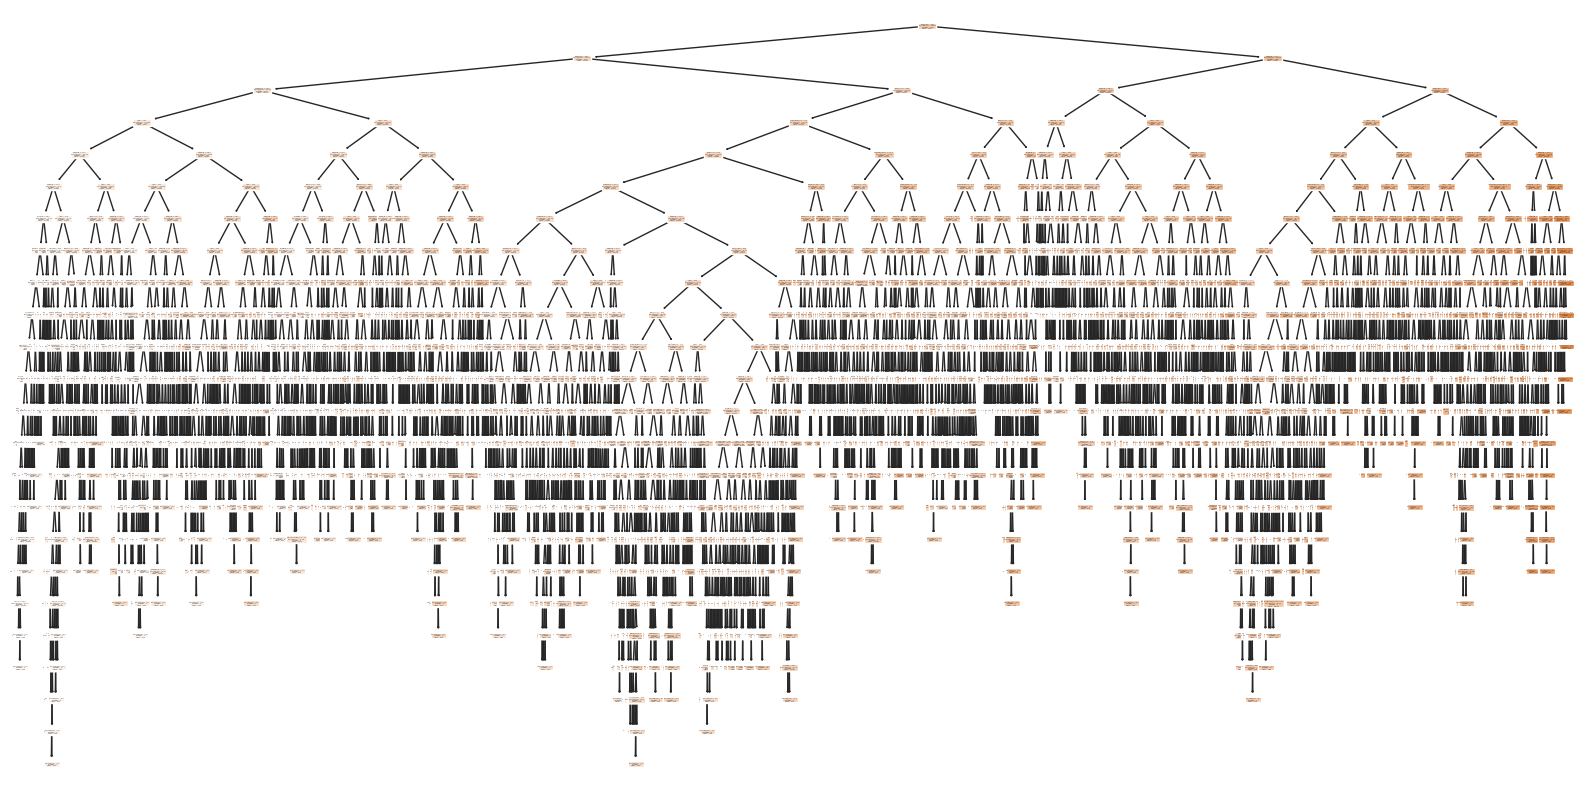

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you want to plot the first tree of the RandomForestRegressor
# You can change `estimator` to `gb_model` to plot a tree from GradientBoostingRegressor
plt.figure(figsize=(20, 10))
plot_tree(RF_model.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()


In [ ]:
GB_perm = PermutationImportance(gb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3693 ± 0.0099,Potential
0.2010 ± 0.0068,Age
0.0774 ± 0.0021,Reactions
0.0659 ± 0.0052,BallControl
0.0477 ± 0.0018,GKReflexes
0.0317 ± 0.0015,GKDiving
0.0236 ± 0.0021,HeadingAccuracy
0.0224 ± 0.0014,ShortPassing
0.0199 ± 0.0018,GKHandling
0.0151 ± 0.0011,Skill Moves


In [ ]:
RF_perm = PermutationImportance(RF_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3693 ± 0.0099,Potential
0.2010 ± 0.0068,Age
0.0774 ± 0.0021,Reactions
0.0659 ± 0.0052,BallControl
0.0477 ± 0.0018,GKReflexes
0.0317 ± 0.0015,GKDiving
0.0236 ± 0.0021,HeadingAccuracy
0.0224 ± 0.0014,ShortPassing
0.0199 ± 0.0018,GKHandling
0.0151 ± 0.0011,Skill Moves


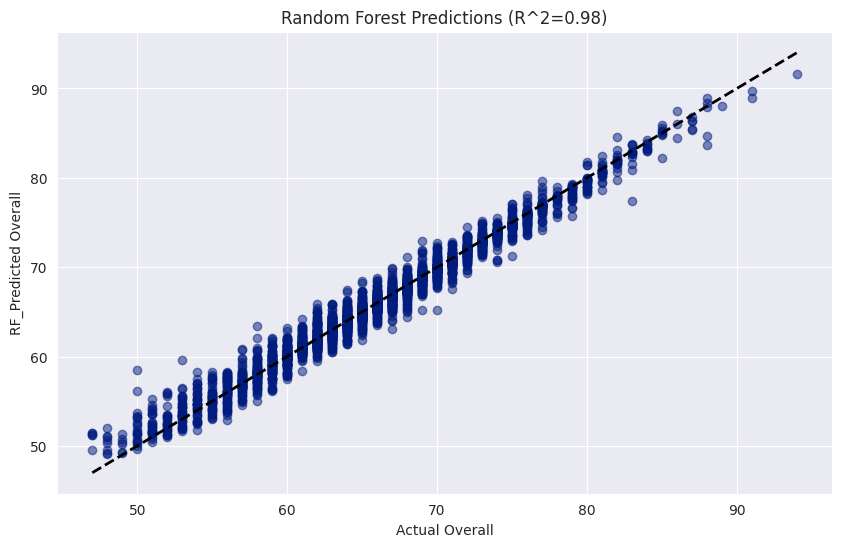

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, RF_predictions, alpha=0.5)
plt.xlabel('Actual Overall')
plt.ylabel('RF_Predicted Overall')
plt.title(f'Random Forest Predictions (R^2={RF_r2:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 45-degree line
plt.grid(True)
plt.show()

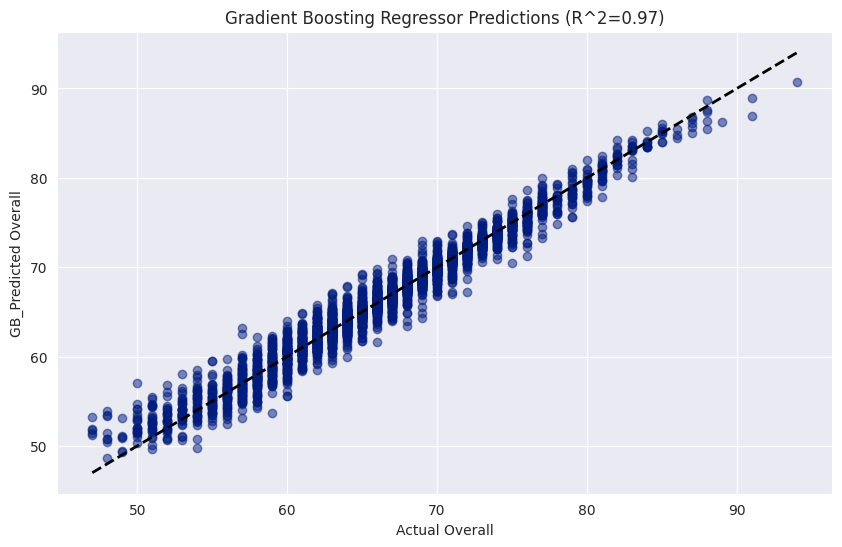

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_predictions, alpha=0.5)
plt.xlabel('Actual Overall')
plt.ylabel('GB_Predicted Overall')
plt.title(f'Gradient Boosting Regressor Predictions (R^2={GB_r2:.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 45-degree line
plt.grid(True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

# Train-Test
from sklearn.model_selection import train_test_split

# Scale
from sklearn.preprocessing import StandardScaler

# Classification Report
from sklearn.metrics import classification_report

In [ ]:
forward = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [ ]:
df.loc[df["Position"] == "GK", "Position"] = 0
df.loc[df["Position"].isin(defender), "Position"] = 1
df.loc[df["Position"].isin(midfielder), "Position"] = 2
df.loc[df["Position"].isin(forward), "Position"] = 3

In [ ]:
#pip install --user --upgrade tensorflow-gpu

In [ ]:
#pip install --user --upgrade tensorboard

In [ ]:
df["Position"].value_counts()

Position
2    6838
1    5866
3    3418
0    2025
Name: count, dtype: int64

In [ ]:
df["Position"].unique()

array([3, 0, 2, 1], dtype=object)

In [ ]:
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
x = df.drop("Position", axis = 1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x = pd.DataFrame(ss.fit_transform(x))

y = df["Position"]

x.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2.532391,1.018293,2.130190,2.434969,2.201010,2.491028,2.925359,2.236808,2.255005,1.767403,...,1.684657,3.265669,-0.717896,-0.909470,-0.923850,-0.599889,-0.318983,-0.074713,-0.140266,-0.485159
1,2.481180,2.111424,1.517765,2.491481,1.725114,1.838695,1.895584,1.584271,2.135138,1.633444,...,2.321491,3.178232,-0.969153,-0.770985,-1.064778,-0.543386,-0.318983,-0.074713,-0.140266,-0.318094
2,2.122700,0.558028,1.721906,2.321945,2.148132,2.219223,2.524891,1.649524,2.195072,1.968342,...,2.066757,3.090795,-1.019405,-1.094116,-0.595016,-0.430379,-0.437259,-0.074713,-0.081569,-0.318094
3,-1.666942,-1.800833,-0.591700,-1.690394,-1.976298,-1.422972,-1.365369,-0.112327,-0.981399,-0.509905,...,-0.544262,0.817436,-1.622423,-1.232601,-1.534540,4.146377,4.057254,4.287959,4.203333,4.304052
4,1.866643,0.155296,2.266284,2.208922,1.619359,2.056139,2.296052,2.497823,1.955338,0.896668,...,1.939390,2.566174,1.040907,0.475378,0.250555,-0.091360,-0.200706,-0.680640,-0.375055,-0.206717


In [ ]:
y.head()

0    3
1    3
2    3
3    0
4    2
Name: Position, dtype: object

In [ ]:
#pip install keras

In [ ]:
from keras.utils import to_categorical
y_cat = to_categorical(y)

y_cat[:10]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat,
                                                    test_size=0.2)

In [ ]:
y.shape

(18147,)

In [ ]:


x.shape



(18147, 33)

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop

In [ ]:
K.clear_session()
model = Sequential()
model.add(Dense(60, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                2040      
                                                                 
 dense_1 (Dense)             (None, 15)                915       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 3019 (11.79 KB)
Trainable params: 3019 (11.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, verbose=1, epochs=10)

Epoch 1/10
454/454 [==============================] - 4s 5ms/step - loss: 0.4268 - accuracy: 0.8218
Epoch 2/10
454/454 [==============================] - 3s 6ms/step - loss: 0.3078 - accuracy: 0.8717
Epoch 3/10
454/454 [==============================] - 3s 6ms/step - loss: 0.2982 - accuracy: 0.8740
Epoch 4/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.8775
Epoch 5/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.8802
Epoch 6/10
454/454 [==============================] - 2s 3ms/step - loss: 0.2847 - accuracy: 0.8791
Epoch 7/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2824 - accuracy: 0.8815
Epoch 8/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.8832
Epoch 9/10
454/454 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.8848
Epoch 10/10
454/454 [==============================] - 2s 3ms/step - loss: 0.2746 - accuracy: 0.8859

In [ ]:
'''y_pred_class = model.predict_classes(x_test)'''

# Get raw predicted probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred_class = y_pred_prob.argmax(axis=-1)

# Display the predicted classes
y_pred_class[:10]


114/114 [==============================] - 0s 2ms/step


array([2, 2, 2, 2, 1, 1, 3, 1, 0, 2])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(x_test)

114/114 [==============================] - 0s 2ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
y_test_class

array([2, 2, 2, ..., 0, 1, 2])

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 412,    0,    0,    0],
       [   0, 1125,  109,    0],
       [   0,   67, 1190,   72],
       [   0,    0,  152,  503]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       0.94      0.91      0.93      1234
           2       0.82      0.90      0.86      1329
           3       0.87      0.77      0.82       655

    accuracy                           0.89      3630
   macro avg       0.91      0.89      0.90      3630
weighted avg       0.89      0.89      0.89      3630



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Clearing the Keras session
keras.backend.clear_session()

# Creating a deeper model with dropout
model = Sequential()
model.add(Dense(128, input_shape=(33,), activation='relu'))  # Increased number of neurons
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))  # Additional layer
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to see the structure and parameter count
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2)  # Includes validation split for monitoring

# Predicting the test set results
y_pred_prob = model.predict(x_test)
y_pred_class = y_pred_prob.argmax(axis=-1)

# Evaluate the model with confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
y_test_class = np.argmax(y_test, axis=1)
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# Clearing the Keras session
keras.backend.clear_session()

# Creating an RNN model with dropout
model = Sequential()
model.add(SimpleRNN(128, input_shape=(33, 1), activation='relu'))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))  # Additional dense layer
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to see the structure and parameter count
model.summary()

# Reshape the input data for RNN
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Train the model
model.fit(x_train_reshaped, y_train, epochs=20, verbose=1, validation_split=0.2)  # Includes validation split for monitoring

# Predicting the test set results
y_pred_prob = model.predict(x_test_reshaped)
y_pred_class = y_pred_prob.argmax(axis=-1)

# Evaluate the model with confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
y_test_class = np.argmax(y_test, axis=1)
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load and display the model architecture plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam

# Clearing the Keras session
keras.backend.clear_session()

# Reshape data for 1D convolutional layer
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Create CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(33, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(x_train_reshaped, y_train, epochs=20, verbose=1, validation_split=0.2)

# Predicting the test set results
y_pred_prob = model.predict(x_test_reshaped)
y_pred_class = y_pred_prob.argmax(axis=-1)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
y_test_class = np.argmax(y_test, axis=1)
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 32)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 32)             0

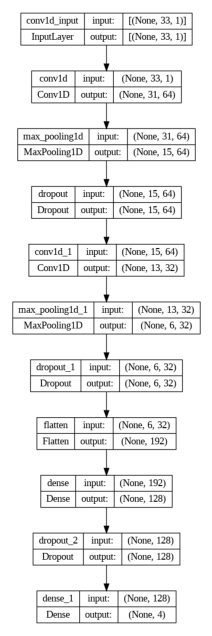

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load and display the model architecture plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()